In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [22]:
df = pd.read_csv('sales_train.csv')
df['date'] = df['date'].astype('datetime64')
df.index = df.date
df = df.drop('date',axis=1)

In [23]:
len(df['item_id'].value_counts())

21807

In [24]:
df['item_id'].value_counts()

20949    31340
5822      9408
17717     9067
2808      7479
4181      6853
         ...  
593          1
13866        1
16574        1
20668        1
0            1
Name: item_id, Length: 21807, dtype: int64

In [217]:
df2 = df[df.item_id==4181]

In [218]:
df3 = df2.reset_index().groupby('date').mean()

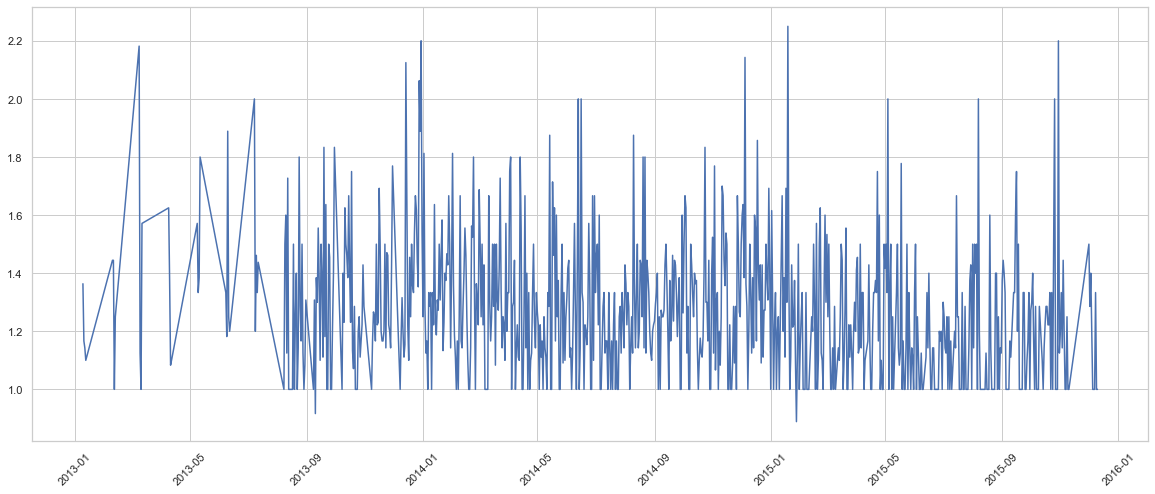

In [219]:
y = df3['item_cnt_day']
x = df3.index
plt.figure(figsize=(20,8))
plt.plot(x,y)
plt.xticks(rotation=45);

In [46]:
df2.reset_index().groupby('date').mean()['item_price'].min()

4.737771739130435

In [48]:
c1 = df2['item_price']==df2['item_price'].min()

In [54]:
df2['item_price'].mean()

4.914855697006738

In [57]:
df2[c1]

,date_block_num,shop_id,item_id,item_price,item_cnt_day
date,,,,,
2014-04-05,16,13,20949,1.83,1.0
2014-06-05,16,13,20949,1.83,2.0
2014-07-05,16,13,20949,1.83,1.0
2014-08-05,16,13,20949,1.83,2.0
2014-09-05,16,13,20949,1.83,3.0
2014-10-05,16,13,20949,1.83,3.0
2014-12-05,16,13,20949,1.83,1.0
2014-05-13,16,13,20949,1.83,1.0
2014-03-05,16,13,20949,1.83,3.0


In [76]:
df3.item_cnt_day.mean()

5.724689172549974

In [73]:
c2 = df3.item_cnt_day>15

In [87]:
df3.loc[c2,'item_cnt_day'] = 6

In [88]:
df3.loc[c2,'item_cnt_day']

date
2013-12-28    6.0
2013-12-29    6.0
2013-12-30    6.0
2013-12-31    6.0
2014-03-15    6.0
2014-06-28    6.0
2014-12-19    6.0
2014-12-27    6.0
2014-12-28    6.0
2014-12-29    6.0
2014-12-30    6.0
2014-12-31    6.0
2015-01-15    6.0
2015-10-14    6.0
Name: item_cnt_day, dtype: float64

In [154]:
df3

,date_block_num,shop_id,item_id,item_price,item_cnt_day
date,,,,,
2013-01-05,4.0,32.555556,20949.0,4.887464,6.388889
2013-01-06,5.0,33.128205,20949.0,4.897436,10.179487
2013-01-07,6.0,31.700000,20949.0,4.850000,5.600000
2013-01-08,7.0,29.333333,20949.0,4.888889,5.305556
2013-01-09,8.0,30.410256,20949.0,4.846154,8.307692
...,...,...,...,...,...
2015-12-06,29.0,29.258065,20949.0,4.953871,4.548387
2015-12-07,30.0,29.560000,20949.0,4.943600,4.240000
2015-12-08,31.0,30.928571,20949.0,4.918571,3.285714


In [245]:
dataset = df3.drop('item_id',axis=1).values
#dataset = dataset.reshape(len(dataset),1)
index = df3.index.values
#scale the data
sca = MinMaxScaler()
dataset = sca.fit_transform(dataset)

In [246]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False, index=None):
    """
    dataset: whole dataset (np array)
    target: target column of whole dataset (put dataset if it has single variable) (np array)
    start_index: starting index of the dataset
    end_index: ending index of the dataset (put None if end index is the last element of dataset)
    history_size: how many data points should appear in past history
    target_size: how many data points you want to predict for future
    step: step size
    single_step: is single step
    index: index array
    """
    
    data = []
    labels = []
    idx = []
    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i, step)
        data.append(dataset[indices])

        if single_step:
            labels.append(target[i+target_size])
        else:
            labels.append(target[i:i+target_size])
        if index is not None:
            idx.append(index[i:i+target_size])

    if index is not None:
        return np.array(data), np.array(labels), np.array(idx)
    else:
        return np.array(data), np.array(labels)

In [247]:
#train-test split and prepare data for time series

TRAIN_SPLIT = int(len(dataset)*0.75) #how many data in train
past_history = 10 #how many data to look in the past for prediction
future_target = 1 #how many data to predict in the future
STEP = 1 #step size

X_train, y_train = multivariate_data(dataset, dataset[:,3], 0,
                                                 TRAIN_SPLIT, past_history,
                                                 future_target, STEP)

X_test, y_test = multivariate_data(dataset, dataset[:,3], TRAIN_SPLIT,
                                             None, past_history,
                                             future_target, STEP)
print(X_train.shape)

#reshape dataset in case of need
if len(X_train.shape)==2:
    X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
    
if len(X_test.shape)==2:
    X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))

(602, 10, 4)


In [248]:
X_train.shape, y_train.shape

((602, 10, 4), (602, 1))

In [249]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras

In [250]:

model = keras.Sequential()
model.add(keras.layers.LSTM(32, input_shape=(X_train.shape[1],X_train.shape[2])))
#model.add(keras.layers.Dropout(0.2))
#model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(y_train.shape[1]))

model.compile(loss='mse',
              optimizer=keras.optimizers.Adam(0.001))
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 32)                4736      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 33        
Total params: 4,769
Trainable params: 4,769
Non-trainable params: 0
_________________________________________________________________


In [251]:
history = model.fit(
        X_train, y_train, 
        epochs=70, 
        batch_size=16, 
        validation_split=0.1, 
        verbose=1,
        shuffle=False
        )

Train on 541 samples, validate on 61 samples
Epoch 1/70
541/541 [==============================] - 4s 7ms/sample - loss: 0.0364 - val_loss: 0.0209
Epoch 2/70
541/541 [==============================] - 1s 1ms/sample - loss: 0.0319 - val_loss: 0.0213
Epoch 3/70
541/541 [==============================] - 1s 1ms/sample - loss: 0.0315 - val_loss: 0.0213
Epoch 4/70
541/541 [==============================] - 1s 1ms/sample - loss: 0.0312 - val_loss: 0.0219
Epoch 5/70
541/541 [==============================] - 1s 1ms/sample - loss: 0.0309 - val_loss: 0.0225
Epoch 6/70
541/541 [==============================] - 1s 1ms/sample - loss: 0.0307 - val_loss: 0.0229
Epoch 7/70
541/541 [==============================] - 1s 2ms/sample - loss: 0.0305 - val_loss: 0.0233
Epoch 8/70
541/541 [==============================] - 1s 1ms/sample - loss: 0.0304 - val_loss: 0.0236
Epoch 9/70
541/541 [==============================] - 2s 3ms/sample - loss: 0.0303 - val_loss: 0.0238
Epoch 10/70
541/541 [================

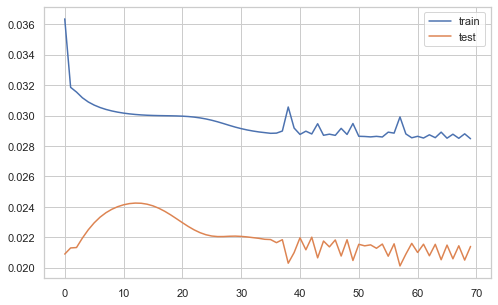

In [252]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

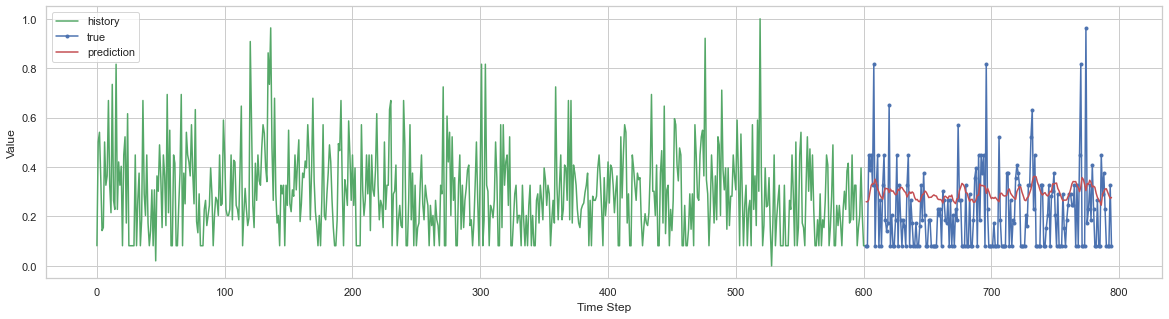

In [253]:
y_pred = model.predict(X_test)
plt.figure(figsize=(20,5))

plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

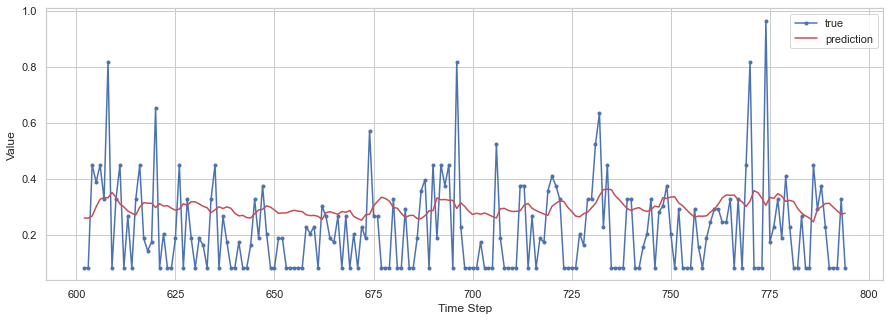

In [254]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [187]:
import fbprophet

In [188]:
def make_verif(forecast, data_train, data_test): 
    """
    Put together the forecast (coming from fbprophet) 
    and the overved data, and set the index to be a proper datetime index, 
    for plotting

    Parameters
    ----------
    forecast : pandas.DataFrame 
        The pandas.DataFrame coming from the `forecast` method of a fbprophet 
        model. 
    
    data_train : pandas.DataFrame
        The training set, pandas.DataFrame

    data_test : pandas.DataFrame
        The training set, pandas.DataFrame
    
    Returns
    -------
    forecast : 
        The forecast DataFrane including the original observed data.

    """
    
    forecast.index = pd.to_datetime(forecast.ds)
    
    data_train.index = pd.to_datetime(data_train.ds)
    
    data_test.index = pd.to_datetime(data_test.ds)
    
    data = pd.concat([data_train, data_test], axis=0)
    
    forecast.loc[:,'y'] = data.loc[:,'y']
    
    return forecast

def plot_verif(verif):
    """
    plots the forecasts and observed data, the `year` argument is used to visualise 
    the division between the training and test sets. 

    Parameters
    ----------
    verif : pandas.DataFrame
        The `verif` DataFrame coming from the `make_verif` function in this package

    year : integer
        The year used to separate the training and test set. Default 2017

    Returns
    -------
    f : matplotlib Figure object

    """
    
    f, ax = plt.subplots(figsize=(14, 8))
    
    train = verif.loc[:"2020-06-01",:]
    
    ax.plot(train.index, train.y, 'ko', markersize=3)
    
    ax.plot(train.index, train.yhat, color='steelblue', lw=0.5)
    
    ax.fill_between(train.index, train.yhat_lower, train.yhat_upper, color='steelblue', alpha=0.3)
    
    test = verif.loc["2020-06-02":,:]
    
    ax.plot(test.index, test.y, 'ro', markersize=3)
    
    ax.plot(test.index, test.yhat, color='coral', lw=0.5)
    
    ax.fill_between(test.index, test.yhat_lower, test.yhat_upper, color='coral', alpha=0.3)
    
    ax.axvline("2020-06-02", color='0.8', alpha=0.7)
    
    ax.grid(ls=':', lw=0.5)
    
    return f


def add_regressor(data, regressor, varname=None): 
    
    """
    adds a regressor to a `pandas.DataFrame` of target (predictand) values 
    for use in fbprophet 

    Parameters
    ----------
    data : pandas.DataFrame 
        The pandas.DataFrame in the fbprophet format (see function `prepare_data` in this package)
    regressor : pandas.DataFrame 
        A pandas.DataFrame containing the extra-regressor
    varname : string 
        The name of the column in the `regressor` DataFrame to add to the `data` DataFrame

    Returns
    -------
    verif : pandas.DataFrame
        The original `data` DataFrame with the column containing the 
        extra regressor `varname`

    """

    data_with_regressors = data.copy()
    
    data_with_regressors.loc[:,varname] = regressor.loc[:,varname]
    
    return data_with_regressors

def add_regressor_to_future(future, regressors_df): 
    """
    adds extra regressors to a `future` DataFrame dataframe created by fbprophet

    Parameters
    ----------
    data : pandas.DataFrame
        A `future` DataFrame created by the fbprophet `make_future` method  
        
    regressors_df: pandas.DataFrame 
        The pandas.DataFrame containing the regressors (with a datetime index)

    Returns
    -------
    futures : pandas.DataFrame
        The `future` DataFrame with the regressors added
    """
    
    futures = future.copy() 
    
    futures.index = pd.to_datetime(futures.ds)
    
    df_w=df_weather.copy()

    data_regressor=pd.merge(df_w,data,how='left',on='ds')
    data_regressor.head()
    
    
    
    data_regressor =  data_regressor.reset_index(drop = True)
    
    return data_regressor

In [220]:
df4 = df3[['item_cnt_day']]
df4.index.name = 'ds'
df4.columns = ['y']
df4

,y
ds,
2013-01-09,1.363636
2013-01-10,1.166667
2013-01-11,1.142857
2013-01-12,1.100000
2013-02-09,1.444444
...,...
2015-12-06,1.000000
2015-12-07,1.000000
2015-12-08,1.333333


In [221]:
df4.iloc[int(len(df4)*0.75)]

y    1.2
Name: 2015-04-18 00:00:00, dtype: float64

In [223]:
Prophet = fbprophet.Prophet
np.random.seed(42)
fbprophet.__version__

'0.7.1'

In [224]:
day2 = "2015-04-19"
data_train = df4.loc[:"2015-04-18",:]
data_test = df4.loc[day2:,:]

data_train=data_train.reset_index()
data_test=data_test.reset_index()
data_train.ds = data_train.ds.astype('datetime64')
data_test.ds = data_test.ds.astype('datetime64')

In [225]:
data_train

,ds,y
0,2013-01-09,1.363636
1,2013-01-10,1.166667
2,2013-01-11,1.142857
3,2013-01-12,1.100000
4,2013-02-09,1.444444
...,...,...
608,2015-04-14,1.428571
609,2015-04-15,1.166667
610,2015-04-16,1.000000
611,2015-04-17,1.000000


In [226]:
m = Prophet(changepoint_prior_scale=0.01, seasonality_mode='multiplicative', \
                yearly_seasonality='auto', \
                weekly_seasonality=True, \
                daily_seasonality=False,)
m.fit(data_train)

In [227]:
future = m.make_future_dataframe(periods=len(data_test), freq='1D')
    
    
forecast = m.predict(future)
    
verif = make_verif(forecast, data_train, data_test)

/opt/anaconda3/lib/python3.7/site-packages/fbprophet/plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)
/opt/anaconda3/lib/python3.7/site-packages/fbprophet/plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


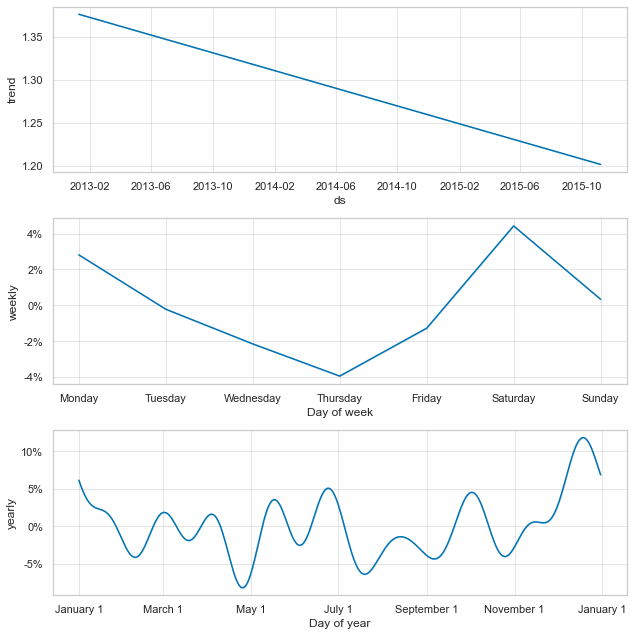

In [228]:
f = m.plot_components(forecast,weekly_start=1)

In [229]:
verif

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat,y
ds,,,,,,,,,,,,,,,,,,,,
2013-01-09,2013-01-09,1.376018,1.103566,1.677314,1.376018,1.376018,0.008414,0.008414,0.008414,-0.021504,-0.021504,-0.021504,0.029918,0.029918,0.029918,0.0,0.0,0.0,1.387596,1.363636
2013-01-10,2013-01-10,1.375849,1.062345,1.653970,1.375849,1.375849,-0.011439,-0.011439,-0.011439,-0.039471,-0.039471,-0.039471,0.028033,0.028033,0.028033,0.0,0.0,0.0,1.360111,1.166667
2013-01-11,2013-01-11,1.375680,1.104837,1.670157,1.375680,1.375680,0.013775,0.013775,0.013775,-0.012760,-0.012760,-0.012760,0.026535,0.026535,0.026535,0.0,0.0,0.0,1.394630,1.142857
2013-01-12,2013-01-12,1.375511,1.191989,1.770273,1.375511,1.375511,0.069686,0.069686,0.069686,0.044320,0.044320,0.044320,0.025366,0.025366,0.025366,0.0,0.0,0.0,1.471366,1.100000
2013-02-09,2013-02-09,1.370786,1.090186,1.657191,1.370786,1.370786,0.002900,0.002900,0.002900,0.044320,0.044320,0.044320,-0.041420,-0.041420,-0.041420,0.0,0.0,0.0,1.374761,1.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-11-03,2015-11-03,1.202523,0.900999,1.462695,1.202523,1.202523,-0.024185,-0.024185,-0.024185,-0.002156,-0.002156,-0.002156,-0.022029,-0.022029,-0.022029,0.0,0.0,0.0,1.173440,1.142857
2015-11-04,2015-11-04,1.202354,0.854805,1.429844,1.202354,1.202354,-0.039953,-0.039953,-0.039953,-0.021504,-0.021504,-0.021504,-0.018449,-0.018449,-0.018449,0.0,0.0,0.0,1.154316,1.444444
2015-11-05,2015-11-05,1.202186,0.853669,1.436352,1.202185,1.202186,-0.054360,-0.054360,-0.054360,-0.039471,-0.039471,-0.039471,-0.014889,-0.014889,-0.014889,0.0,0.0,0.0,1.136835,1.200000


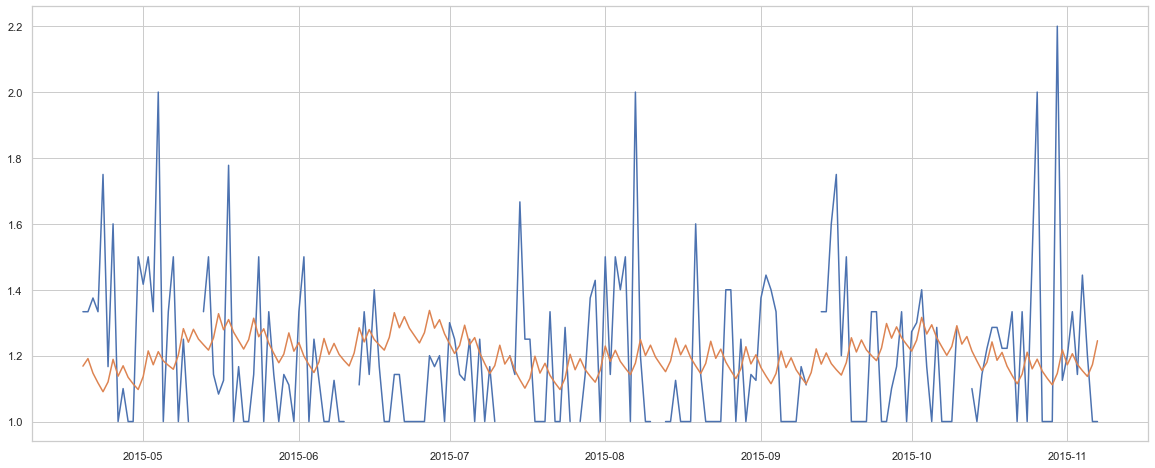

In [231]:
plt.figure(figsize=(20,8))
plt.plot(forecast[day2:].ds.astype('datetime64'),forecast[day2:]['y'])
plt.plot(forecast[day2:].ds.astype('datetime64'),forecast[day2:]['yhat'])




In [255]:
tdf = pd.read_csv('daily-min-temperatures.csv')

In [257]:
tdf.columns = ['ds','y']


In [262]:
tdf.ds = tdf.ds.astype('datetime64')

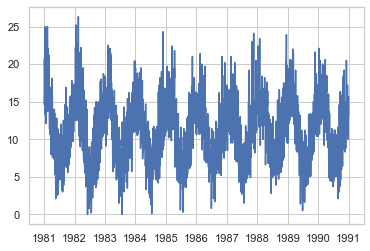

In [263]:
plt.plot(tdf.ds,tdf.y)

In [264]:
tdf.iloc[int(len(tdf)*0.75)]

ds    1988-07-01 00:00:00
y                       6
Name: 2737, dtype: object

In [265]:
day1 = "1988-07-01"
day2 = "1988-07-02"
data_train = tdf.loc[:day1,:]
data_test = tdf.loc[day2:,:]

data_train=data_train.reset_index()
data_test=data_test.reset_index()
data_train.ds = data_train.ds.astype('datetime64')
data_test.ds = data_test.ds.astype('datetime64')

In [269]:
tdf['year'] = tdf.ds.dt.year

<AxesSubplot:xlabel='year'>

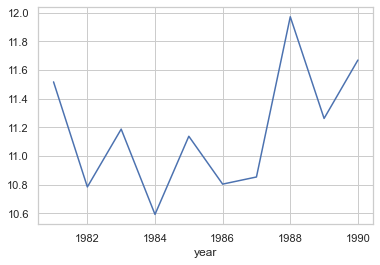

In [272]:
tdf.groupby('year').mean().y.plot()

In [278]:
m = Prophet(changepoint_prior_scale=0.01, seasonality_mode='multiplicative', \
                yearly_seasonality='auto', \
                weekly_seasonality=False, \
                daily_seasonality=False,)
m.fit(data_train)

In [282]:
future = m.make_future_dataframe(periods=len(data_test)+365, freq='1D')
    
    
forecast = m.predict(future)
    
verif = make_verif(forecast, data_train, data_test)

/opt/anaconda3/lib/python3.7/site-packages/fbprophet/plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


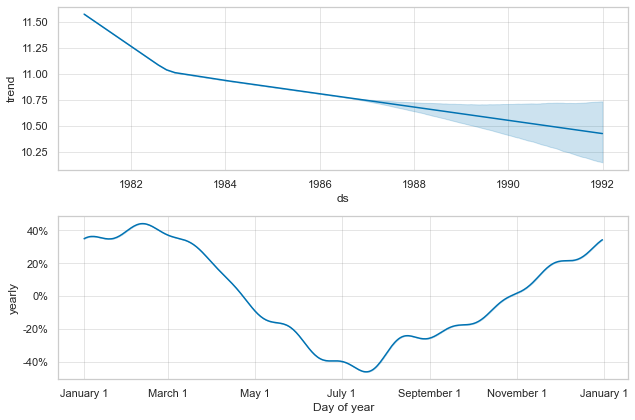

In [283]:
f = m.plot_components(forecast,weekly_start=1)

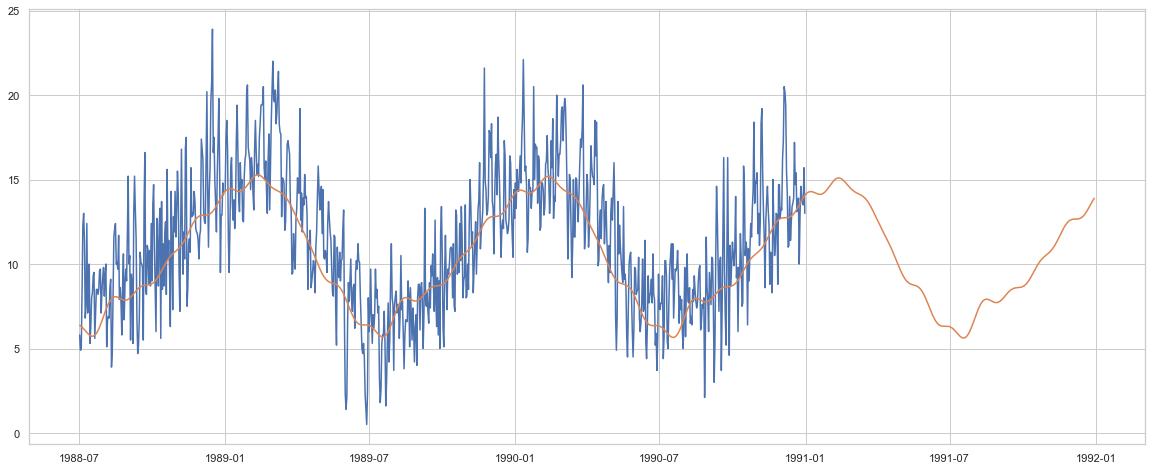

In [284]:
plt.figure(figsize=(20,8))
plt.plot(forecast[day2:].ds.astype('datetime64'),forecast[day2:]['y'])
plt.plot(forecast[day2:].ds.astype('datetime64'),forecast[day2:]['yhat'])





In [286]:
tdf.loc['1988-07-02':,:]

,ds,y,year
1989,1986-06-14,7.0,1986
1990,1986-06-15,6.8,1986
1991,1986-06-16,6.9,1986
1992,1986-06-17,8.0,1986
1993,1986-06-18,7.6,1986
...,...,...,...
3645,1990-12-27,14.0,1990
3646,1990-12-28,13.6,1990
3647,1990-12-29,13.5,1990
3648,1990-12-30,15.7,1990
